In [2]:
# Establish Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st 
from pprint import pprint
import numpy as np 
import seaborn as sns
# Set csv location into variable
heart_data = "Resources/heart_data.csv"

# Use Pandas csv reader to review data
heart_data = pd.read_csv(heart_data)

# Rename columns 
heart_data.columns = ['Age', 'Sex', 'Chest Pain', 'Resting Blood Pressure', 'Cholesterol (mg/dl)', 'Fasting Blood Sugar > 120', 'Rest (ECG)', 'Max Heart Rate', 'Exercise Induced Angina', 'ST Depression Induced', 'Slope', 'Number of Major Vessels (ca)', 'NST Result', 'Target']

heart_data.head()
#Replace numbers on 'Sex' column with its corresponding strings value
heart_data['Sex']=heart_data['Sex'].replace(0, 'Female')
heart_data['Sex']=heart_data['Sex'].replace(1, 'Male')

#Replace numbers on 'Fasting Blood Sugar' column with its corresponding strings value
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(0,"False")
heart_data['Fasting Blood Sugar > 120']=heart_data['Fasting Blood Sugar > 120'].replace(1,"True")

#Replace numbers on 'ex Agina' column with its corresponding strings value
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(0,"No")
heart_data['Exercise Induced Angina']=heart_data['Exercise Induced Angina'].replace(1,"Yes")

#Replace numbers on 'Thal' column with its corresponding strings value
heart_data['NST Result']=heart_data['NST Result'].replace(1,"Normal")
heart_data['NST Result']=heart_data['NST Result'].replace(2,"Fixed Defect")
heart_data['NST Result']=heart_data['NST Result'].replace(3,"Reversible Defect")

#Replace numbers on 'Chest Pain' column with its corresponding strings value
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(0,"Asymptomatic")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(1,"Atypical angina")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(2,"Non-anginal pain")
heart_data['Chest Pain']=heart_data['Chest Pain'].replace(3,"Typical angina")

#Replace numbers on 'Target' column with its corresponding strings value
heart_data['Target']=heart_data['Target'].replace(0,"Disease")
heart_data['Target']=heart_data['Target'].replace(1,"No disease")

#Replace numbers on 'Rest (ECG)' column with its corresponding strings value
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(0,"Probable ventricular hypertrophy ")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(1,"Normal")
heart_data['Rest (ECG)']=heart_data['Rest (ECG)'].replace(2,"ST-T wave abnormality")

#Replace numbers on 'Slope' column with its corresponding strings value
heart_data['Slope']=heart_data['Slope'].replace(0,"Downsloping")
heart_data['Slope']=heart_data['Slope'].replace(1,"Flat")
heart_data['Slope']=heart_data['Slope'].replace(2,"Upsloping")

#remove all value 0 on NST Result
heart_data = heart_data[heart_data['NST Result'] != 0]

#remove all value 4 on ca 'Number of Major Vessels (ca)'
heart_data = heart_data[heart_data['Number of Major Vessels (ca)'] != 4]

heart_data.head()

,Age,Sex,Chest Pain,Resting Blood Pressure,Cholesterol (mg/dl),Fasting Blood Sugar > 120,Rest (ECG),Max Heart Rate,Exercise Induced Angina,ST Depression Induced,Slope,Number of Major Vessels (ca),NST Result,Target
0,63,Male,Typical angina,145,233,True,Probable ventricular hypertrophy,150,No,2.3,Downsloping,0,Normal,No disease
1,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Fixed Defect,No disease
2,41,Female,Atypical angina,130,204,False,Probable ventricular hypertrophy,172,No,1.4,Upsloping,0,Fixed Defect,No disease
3,56,Male,Atypical angina,120,236,False,Normal,178,No,0.8,Upsloping,0,Fixed Defect,No disease
4,57,Female,Asymptomatic,120,354,False,Normal,163,Yes,0.6,Upsloping,0,Fixed Defect,No disease


This graph shows a histogram of the ages of everyone in the study. Visually it looks normally distributed, with a large subset between ~53-67.

Text(0.5, 1.0, 'Distribution of Age')

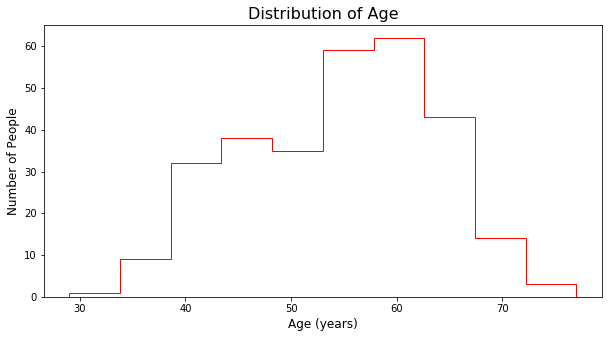

In [3]:
#Plot distribution of age
ages = heart_data['Age']
plt.figure(figsize=(10,5))
plt.hist(ages, histtype = 'step', color='red')
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Age', fontsize = 16)

Distribution of male versus female. Males make up over 2/3 of the study participants.

Text(0.5, 1.0, 'Gender Distribution')

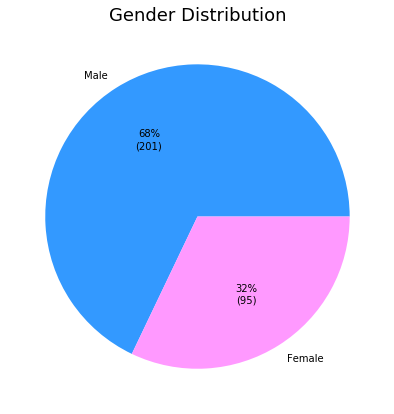

In [4]:
# Get counts of genders
gender_counts = heart_data['Sex'].value_counts()

# Create function to format percentage and value for pie chart labels
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plot gender distribution
plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=['Male', 'Female'], colors=['#3399FF', '#FF99FF'],
        autopct=make_autopct(gender_counts))
plt.title('Gender Distribution', fontdict={'fontsize':18})

Distribution of participants between disease vs no disease. It is distributed almost evenly.

Text(0.5, 1.0, 'Disease Presence Distribution')

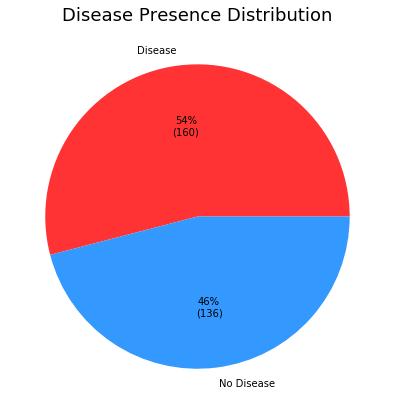

In [5]:
# Create counts of heart disease presence
target_counts = heart_data['Target'].value_counts()

# Create function to format percentage and value for pie chart labels
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(target_counts, labels=['Disease', 'No Disease'], colors = ['#FF3333', '#3399FF'],
        autopct=make_autopct(gender_counts))
plt.title('Disease Presence Distribution', fontdict={'fontsize':18})


In [6]:
disease_df = heart_data[heart_data['Target'] == 'Disease']
no_disease_df = heart_data[heart_data['Target'] == 'No disease']

Text(0.5, 1.0, 'Distribution of Age (Disease vs. No Disease)')

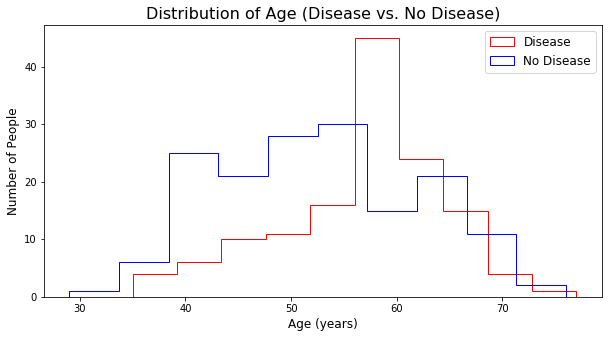

In [7]:
# Create disease / no disease histograms by age
disease_ages = disease_df['Age']
no_disease_ages = no_disease_df['Age']
plt.figure(figsize=(10,5))
plt.hist(disease_ages, histtype = 'step', color='red')
plt.hist(no_disease_ages, histtype = 'step', color='blue')
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Age (Disease vs. No Disease)', fontsize = 16)

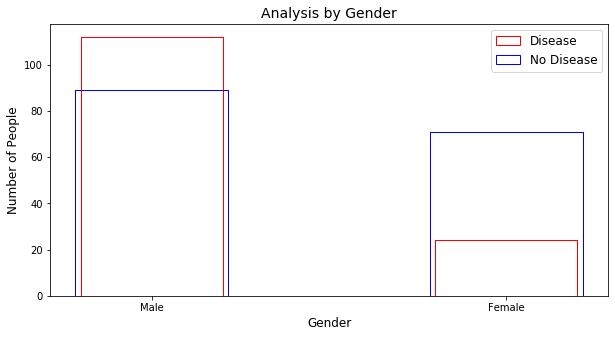

In [23]:
#analysis by sex
female_df = disease_df[disease_df['Sex'] == 'Female']

desease_female = female_df['Sex']
desease_f_count = len(desease_female)

male_df = disease_df[disease_df['Sex'] == 'Male']

desease_male = male_df['Sex']
desease_m_count=len(desease_male)

female_df = no_disease_df[no_disease_df['Sex'] == 'Female']
female = female_df['Sex']
f_count = len(female)

male_df = no_disease_df[no_disease_df['Sex'] == 'Male']

male = male_df['Sex']
m_count=len(male)

plt.figure(figsize=(10,5))
plt.title("Analysis by Gender",fontsize = 14)

plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)

plt.bar(desease_male, desease_m_count, width=0.4, edgecolor='red', color='None')
plt.bar(female, f_count, width=0.43, edgecolor='blue', color='None')

plt.bar(male, m_count, width=0.43, edgecolor='blue', color='None')
plt.bar(desease_female, desease_f_count, width=0.4, edgecolor='red', color='None')

plt.legend(['Disease', 'No Disease'], fontsize = 12)

In [9]:
#Group by heart disease presence
grouped_df = heart_data.groupby('Target')

#Count gender values
sex_df = pd.DataFrame(grouped_df['Sex'].value_counts())
sex_df

Sex
Target     Sex        
Disease    Male    112
           Female   24
No disease Male     89
           Female   71

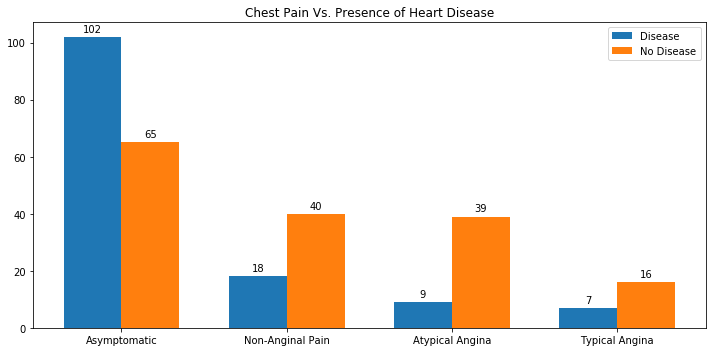

In [10]:
# Chest pain vs. Heart Disease Bar Chart
labels = ['Asymptomatic', 'Non-Anginal Pain', 'Atypical Angina', 'Typical Angina']
disease_pain_list = disease_df['Chest Pain'].value_counts()
no_disease_pain_list = no_disease_df['Chest Pain'].value_counts()

#Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar((x - width/2), disease_pain_list, width, label='Disease')
rects2 = ax.bar((x + width/2), no_disease_pain_list, width, label='No Disease')

#Add labels, title , axis tic labels
ax.set_ylabel('')
ax.set_title('Chest Pain Vs. Presence of Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

"""Attach a text label above each bar in *rects*, displaying its height."""
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Cholesterol Level Vs. Presence of Heart Disease ')

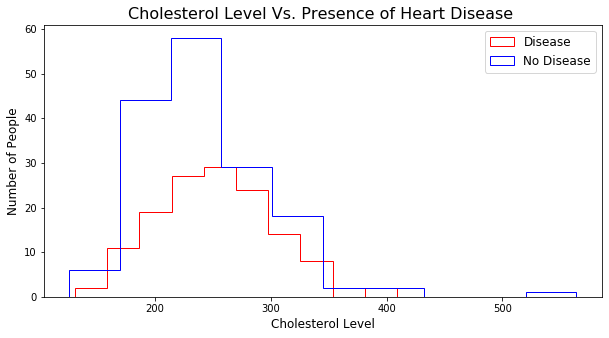

In [11]:
#Cholesterol vs Heart Disease graph
disease_ages = disease_df['Cholesterol (mg/dl)']
no_disease_ages = no_disease_df['Cholesterol (mg/dl)']
plt.figure(figsize=(10,5))
plt.hist(disease_ages, histtype = 'step', color='red')
plt.hist(no_disease_ages, histtype = 'step', color='blue')
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Cholesterol Level', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Cholesterol Level Vs. Presence of Heart Disease ', fontsize = 16)

In [12]:
#Dataframe representing the Heart Induced Agnia for all patience 
heart_data2 = pd.DataFrame({"Count":heart_data.groupby(["Target","Exercise Induced Angina"]).size()}).reset_index()
heart_data2

,Target,Exercise Induced Angina,Count
0,Disease,No,62
1,Disease,Yes,74
2,No disease,No,137
3,No disease,Yes,23


Text(0, 0.5, 'Number of Patients')

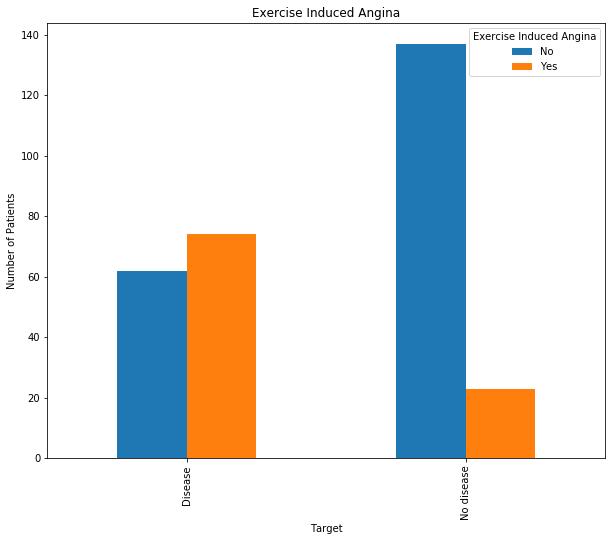

In [13]:
#Create a Heart enduced Agnia graph
heart_data2.pivot(index='Target', columns='Exercise Induced Angina', values='Count').plot(figsize = (10,8), kind='bar')
plt.title("Exercise Induced Angina")
plt.ylabel("Number of Patients")

In [14]:
#Dataframe comprised of those who's blood sugar is above 120
heart_data3 = pd.DataFrame({"Count":heart_data.groupby(["Target","Fasting Blood Sugar > 120"]).size()}).reset_index()
heart_data3

,Target,Fasting Blood Sugar > 120,Count
0,Disease,False,116
1,Disease,True,20
2,No disease,False,137
3,No disease,True,23


Text(0, 0.5, 'Number of Patients')

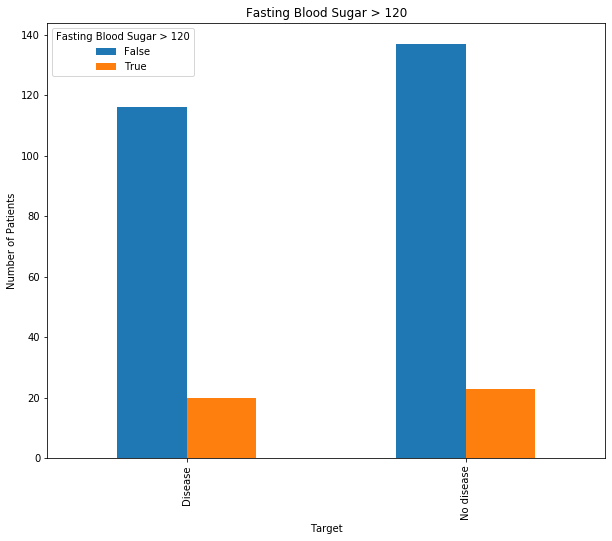

In [15]:
#Fasting blood sugar graph
heart_data3.pivot(index='Target', columns='Fasting Blood Sugar > 120', values='Count').plot(figsize = (10,8),kind='bar')
plt.title("Fasting Blood Sugar > 120")
#plt.xlabel("Gym Name")
plt.ylabel("Number of Patients")


Text(0.5, 1.0, 'Cholesterol on Patients with Heart Disease')

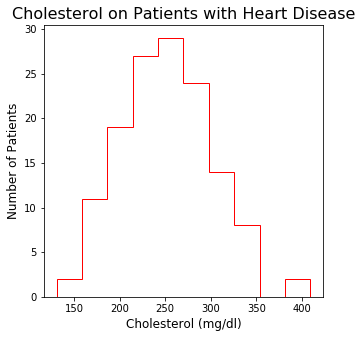

In [16]:
#Checking for normal distrobution for ttest
disease_df = heart_data[heart_data['Target'] == 'Disease']
disease_cho = disease_df['Cholesterol (mg/dl)']

plt.figure(figsize=(5,5))
plt.hist(disease_cho, histtype = 'step', color='red')

plt.xlabel('Cholesterol (mg/dl)', fontsize = 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.title('Cholesterol on Patients with Heart Disease', fontsize = 16)  


Text(0.5, 1.0, 'Distribution of Cholesterol on Patients with Heart Disease')

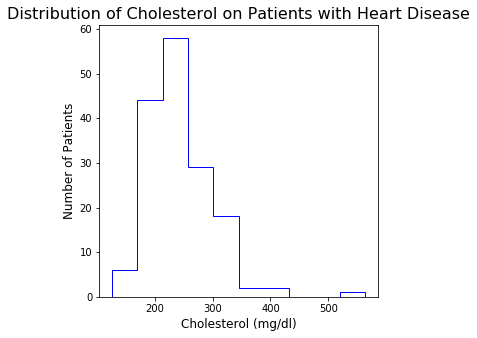

In [17]:
#checking for normal distrobution for ttest
no_disease_ages = no_disease_df['Cholesterol (mg/dl)']

plt.figure(figsize=(5,5))

plt.hist(no_disease_ages, histtype = 'step', color='blue')

plt.xlabel('Cholesterol (mg/dl)', fontsize = 12)
plt.ylabel('Number of Patients', fontsize = 12)
plt.title('Distribution of Cholesterol on Patients with Heart Disease', fontsize = 16)


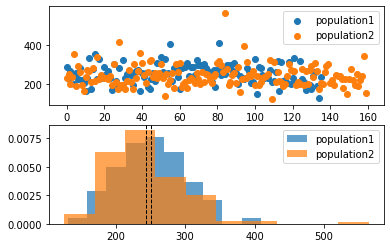

In [18]:
# Generate data to test with
population1 = disease_df['Cholesterol (mg/dl)']
population2 = no_disease_df['Cholesterol (mg/dl)']

#Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(population1)), population1, label="population1")
plt.scatter(range(len(population2)), population2, label="population2")
plt.legend()

#Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
    
#population1, population2

In [19]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=1.324775726823215, pvalue=0.18628152324463207)

This figure shows the histograms of maximum heart rates between patients with heart disease (red line) and patients with no heart disease (blue line). The figure tells us that patients with disease tend to have lower maximum heart rates and that the distribution of the heart rates is more spread out. Patients with no disease tend to have higher maximum rates and the distribution is less spread out.

Based on the figure that plots the ages of disease vs no disease patients, we can see that those with disease tend to be older. A higher maximum heart rate is, generally, a good sign; however, maximum heart rates decrease with age, so this may be why the group with disease in this figure (red line)  is lower then the group with no disease.

Text(0.5, 1.0, 'Distribution of Max Heart Rates (Disease vs. No Disease)')

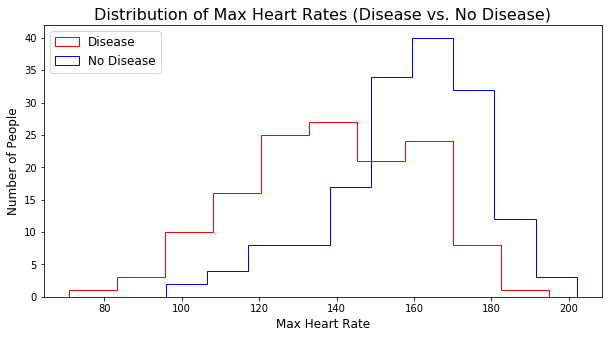

In [20]:
#Create disease / no_disease variables for max heart rate
disease_max_HR = disease_df['Max Heart Rate']
no_disease_max_HR = no_disease_df['Max Heart Rate']

#plot max heart rate variables
plt.figure(figsize=(10,5))
plt.hist(disease_max_HR, histtype = 'step', color='red')
plt.hist(no_disease_max_HR, histtype = 'step', color='blue')

#Add labels
plt.legend(['Disease', 'No Disease'], fontsize = 12)
plt.xlabel('Max Heart Rate', fontsize = 12)
plt.ylabel('Number of People', fontsize = 12)
plt.title('Distribution of Max Heart Rates (Disease vs. No Disease)', fontsize = 16)

This figure shows the relationship between age and cholesterol. Statistically, we see a correlation coefficient of 0.2, which is a weak correlation. We can infer that there is a tendency to have slightly higher cholesterol as you age.

Correlation coefficient: 0.2


Text(0.5, 1.0, 'Age vs. Cholesterol (mg/dl)')

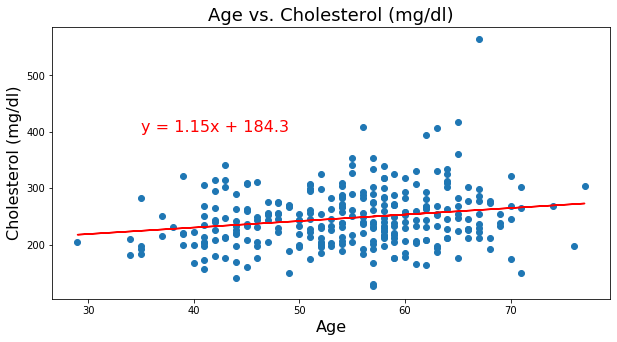

In [21]:
# Create variables for cholesterol and age
cholesterol = heart_data['Cholesterol (mg/dl)']
age = heart_data['Age']

# Perform linear regression on cholesterol and age
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(age, cholesterol)
regress_values = age * slope + intercept
print(f'Correlation coefficient: {round(rvalue,2)}')
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Plot scatter, annotate with line equation
plt.figure(figsize = (10,5))
plt.scatter(age, cholesterol)
plt.plot(age, regress_values, "r-")
plt.annotate(line_eq, (35, 400), fontsize=16, color='red')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Cholesterol (mg/dl)', fontsize = 16)
plt.title('Age vs. Cholesterol (mg/dl)', fontsize = 18)